In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('results.txt', sep=",")
data.columns= ["Name", "L1H", "L1M", "L2H", "L2M"]

In [3]:
data

,Name,L1H,L1M,L2H,L2M
0,mnk,4814819345,2461591021,2154292223,304309672
1,nmk,5115119929,2576828090,2564023942,7007007
2,kmn,5095099875,518562164,457743145,59059059
3,knm,5115119948,3639569609,3431502770,215215216
4,nkm,5065069839,3639569650,3405894539,231231233
5,mkn,5635640945,560175175,518562165,4104104


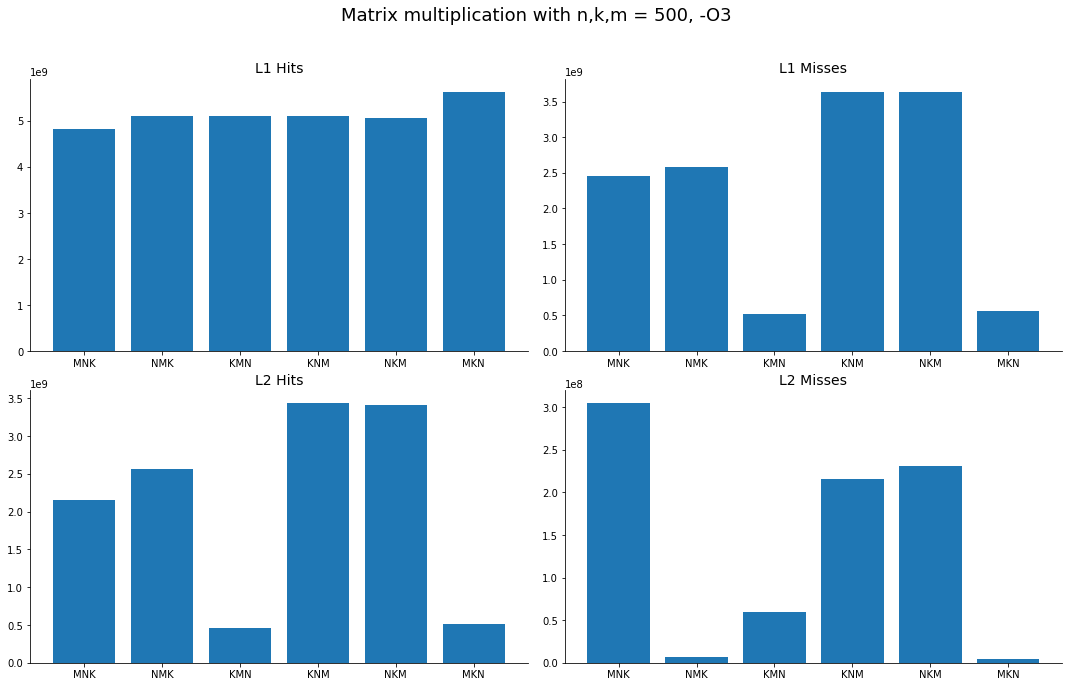

In [4]:
names = [i.upper() for i in list(data["Name"])]

fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0][0].bar(names, list(data["L1H"]))
axs[0][0].set_title("L1 Hits", fontsize=14)
axs[0][0].spines["right"].set_visible(False)
axs[0][0].spines["top"].set_visible(False)

axs[0][1].bar(names, list(data["L1M"]))
axs[0][1].set_title("L1 Misses", fontsize=14)
axs[0][1].spines["right"].set_visible(False)
axs[0][1].spines["top"].set_visible(False)

axs[1][0].bar(names, list(data["L2H"]))
axs[1][0].set_title("L2 Hits", fontsize=14)
axs[1][0].spines["right"].set_visible(False)
axs[1][0].spines["top"].set_visible(False)

axs[1][1].bar(names, list(data["L2M"]))
axs[1][1].set_title("L2 Misses", fontsize=14)
axs[1][1].spines["right"].set_visible(False)
axs[1][1].spines["top"].set_visible(False)


fig.tight_layout()

st = fig.suptitle("Matrix multiplication with n,k,m = 500, -O3", fontsize="18")

st.set_y(0.95)
fig.subplots_adjust(top=0.85)

plt.savefig("figs/profiling_of_variations.png", transparent=True)
plt.show()

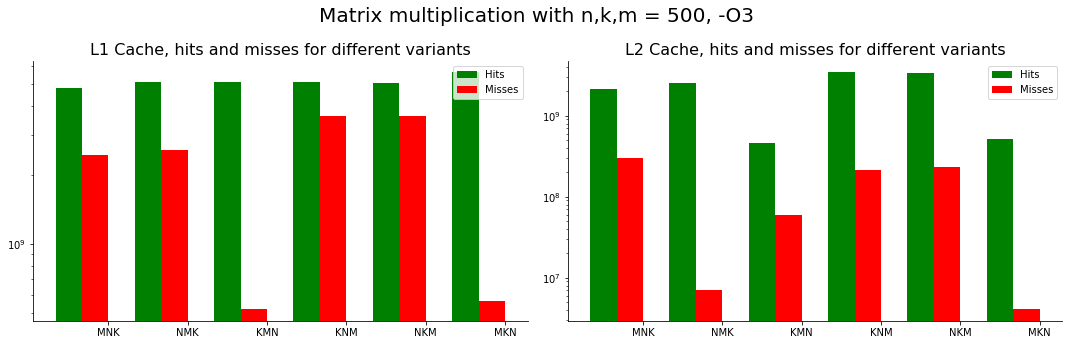

In [5]:
names = [i.upper() for i in list(data["Name"])]

N = len(names)
width = 1
ind = np.arange(N)

fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].bar(ind, list(data["L1H"]), width/3, label="Hits", color='g')
axs[0].bar(ind + width/3, list(data["L1M"]), width/3, label="Misses", color='r')
axs[0].set_title("L1 Cache, hits and misses for different variants", fontsize=16)
axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].set_xticks(ind + width/2)
axs[0].set_xticklabels(names)
axs[0].legend()
axs[0].set_yscale('log')

axs[1].bar(ind, list(data["L2H"]), width/3, label="Hits", color='g')
axs[1].bar(ind + width/3, list(data["L2M"]), width/3, label="Misses", color='r')
axs[1].set_title("L2 Cache, hits and misses for different variants", fontsize=16)
axs[1].spines["right"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].set_xticks(ind + width/2)
axs[1].set_xticklabels(names)
axs[1].legend()
axs[1].set_yscale('log')

fig.tight_layout()

st = fig.suptitle("Matrix multiplication with n,k,m = 500, -O3", fontsize="20")

st.set_y(0.95)
fig.subplots_adjust(top=0.80)

plt.savefig("figs/profiling_of_variations_2.png", transparent=True)
plt.show()

# Visualization, flops and memory footprint

In [6]:
def flops_and_footprint_variantions(folder_path, title, show_lib=True,  logy=False, logx=True):
    kmn = pd.read_csv(folder_path+"/kmn.txt", sep="\s+", header=None)
    knm = pd.read_csv(folder_path+"/knm.txt", sep="\s+", header=None)
    lib = pd.read_csv(folder_path+"/lib.txt", sep="\s+", header=None)
    mkn = pd.read_csv(folder_path+"/mkn.txt", sep="\s+", header=None)
    nkm = pd.read_csv(folder_path+"/nkm.txt", sep="\s+", header=None)
    mnk = pd.read_csv(folder_path+"/mnk.txt", sep="\s+", header=None)
    nmk = pd.read_csv(folder_path+"/nmk.txt", sep="\s+", header=None)
    
    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    ax.plot(list(kmn[0]), list(kmn[1]), label="KMN")
    ax.plot(list(knm[0]), list(knm[1]), label="KNM")
    if show_lib:
        ax.plot(list(lib[0]), list(lib[1]), label="LIB")
    ax.plot(list(mkn[0]), list(mkn[1]), label="MKN")
    ax.plot(list(nkm[0]), list(nkm[1]), label="NKM")
    ax.plot(list(mnk[0]), list(mnk[1]), label="MNK")
    ax.plot(list(nmk[0]), list(nmk[1]), label="NMK")

    plt.axvspan(0, 32, facecolor='0.5', alpha=0.15, label='L1 Cache')
    plt.axvspan(32, 32+1024, facecolor='0.5', alpha=0.10, label='L2 Cache')
    plt.axvspan(32+1024, 32+1024+19712, facecolor='0.5', alpha=0.05, label='L3 Cache')

    plt.axvline(x=32, color='black', alpha=0.5)
    plt.axvline(x=1024+32, color='black', alpha=0.5)
    plt.axvline(x=1024+32+19712, color='black', alpha=0.5)

    ax.set_title(title, fontsize=20)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlabel("Memory footprint in kB", fontsize=14)
    #ax.set_xlim(left=1)
    ax.set_ylabel("Mflops", fontsize=14)
    ax.legend()
    if logy:
        ax.set_yscale('log')
    if logx:
        ax.set_xscale('log')

    fig.tight_layout()

    if show_lib:
        plt.savefig("figs/performance_"+folder_path+".png", transparent=True)
    else:
        plt.savefig("figs/performance_"+folder_path+"_nolib.png", transparent=True)        
        
    plt.show()

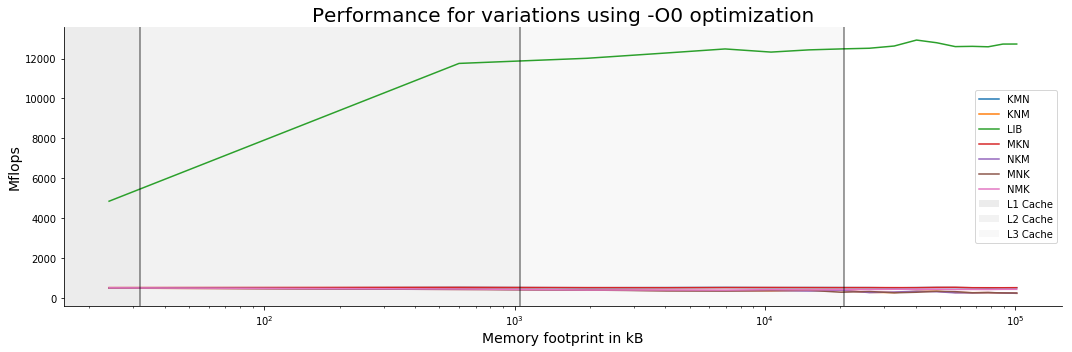

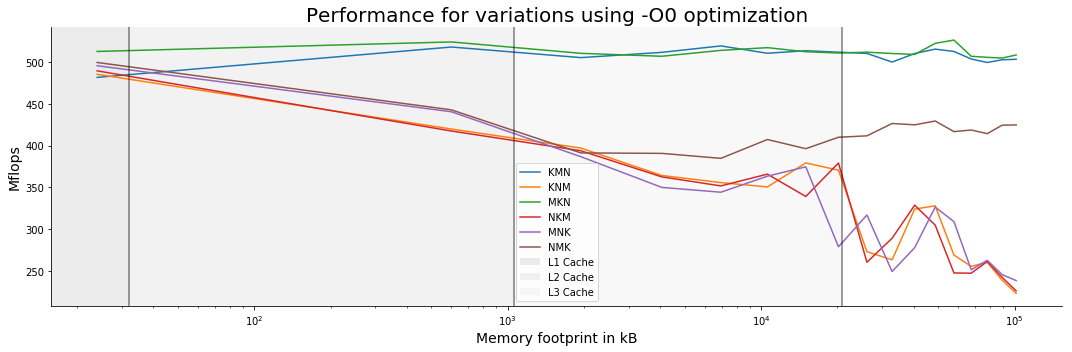

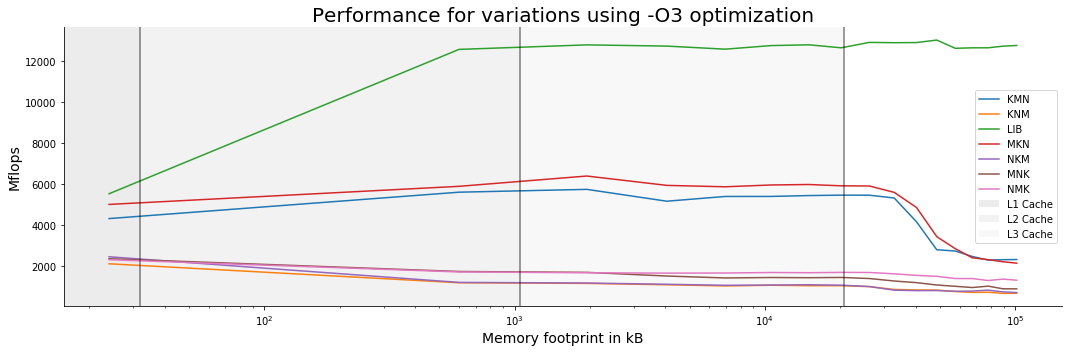

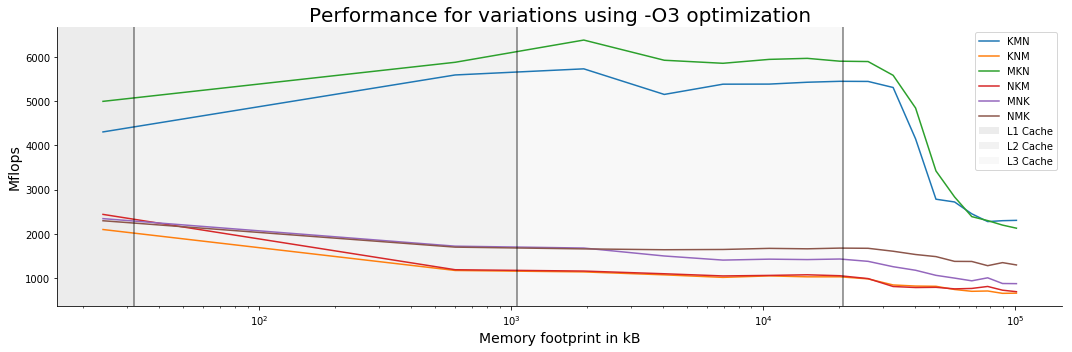

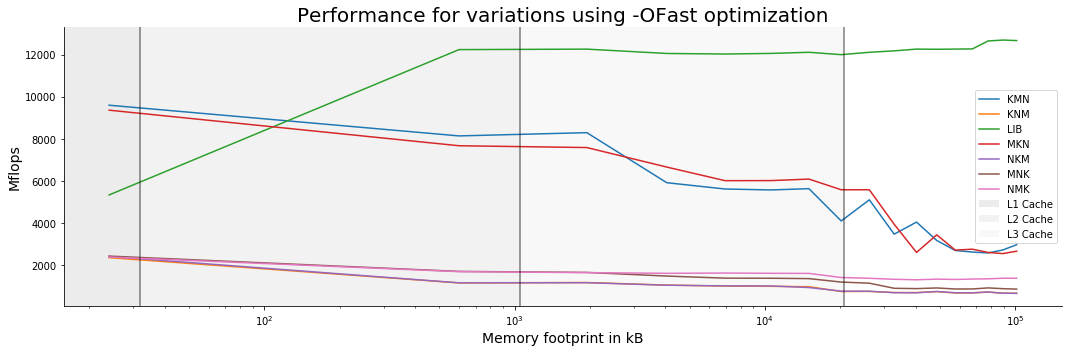

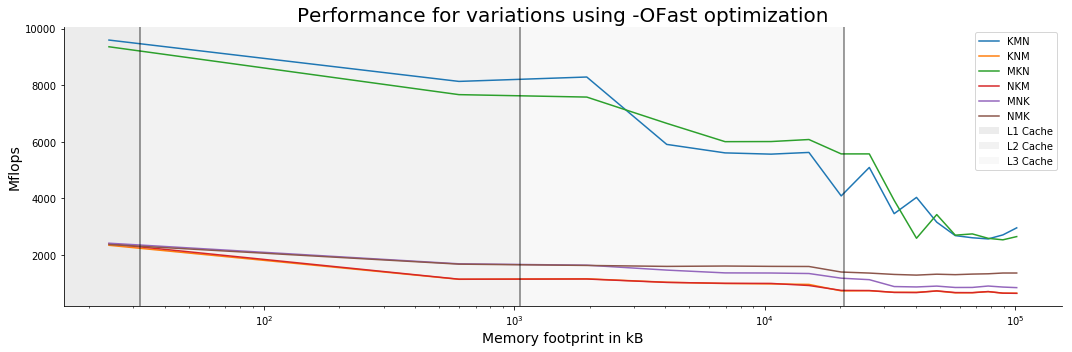

In [7]:
flops_and_footprint_variantions("O0", "Performance for variations using -O0 optimization")
flops_and_footprint_variantions("O0", "Performance for variations using -O0 optimization", show_lib=False)
flops_and_footprint_variantions("O3", "Performance for variations using -O3 optimization")
flops_and_footprint_variantions("O3", "Performance for variations using -O3 optimization", show_lib=False)
flops_and_footprint_variantions("fast", "Performance for variations using -OFast optimization")
flops_and_footprint_variantions("fast", "Performance for variations using -OFast optimization", show_lib=False)

# Visualizations, to block or not to block, and how many?

In [8]:
no_block = pd.read_csv("Blocksizes/no_blk.txt", sep="\s+", header=None)
block_1 = pd.read_csv("Blocksizes/1blk.txt", sep="\s+", header=None)
block_2 = pd.read_csv("Blocksizes/2blk.txt", sep="\s+", header=None)
block_3 = pd.read_csv("Blocksizes/3blk.txt", sep="\s+", header=None)

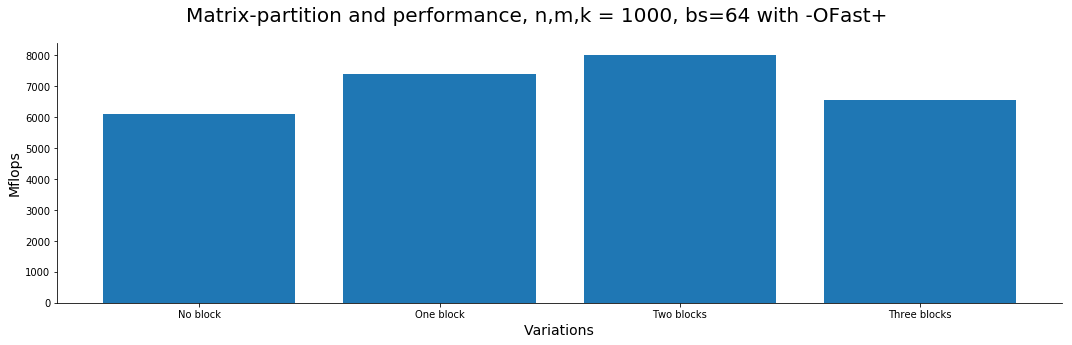

In [9]:
names = ["No block", "One block", "Two blocks", "Three blocks"]
values = [float(no_block[1]), float(block_1[1]), float(block_2[1]), float(block_3[1])]

N = len(names)
ind = np.arange(N)

fig, ax = plt.subplots(1, 1, figsize=(15,5))

ax.bar(names, values)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Variations", fontsize=14)
ax.set_ylabel("Mflops", fontsize=14)

fig.tight_layout()

st = fig.suptitle("Matrix-partition and performance, n,m,k = 1000, bs=64 with -OFast+", fontsize="20")

st.set_y(0.95)
fig.subplots_adjust(top=0.85)

plt.savefig("figs/partition.png", transparent=True)

plt.show()

# What blocksize to use

In [10]:
best_blk = pd.read_csv("best_blk.txt", sep="\s+", header=None)

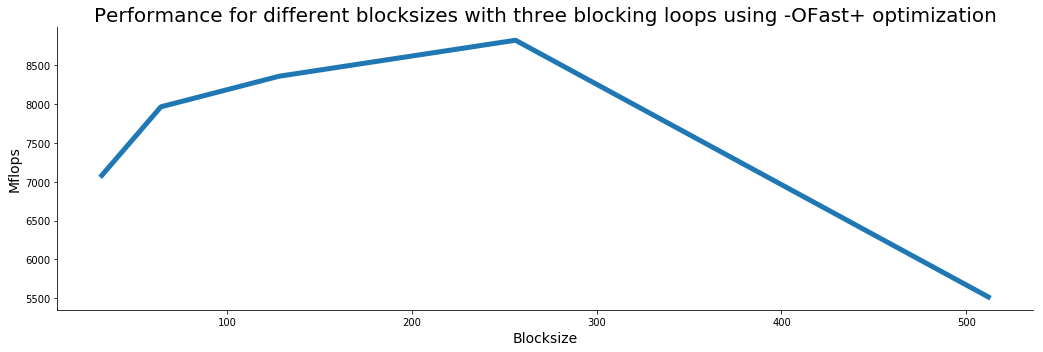

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

ax.plot(list(best_blk[4]), list(best_blk[1]), linewidth=5)

ax.set_title("Performance for different blocksizes with three blocking loops using -OFast+ optimization", fontsize=20)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Blocksize", fontsize=14)
ax.set_ylabel("Mflops", fontsize=14)
fig.tight_layout()

plt.savefig("figs/performance_of_blocksizes.png", transparent=True)

plt.show()

# Nat vs block vs lib

In [12]:
best_blk = pd.read_csv("O3+/best3blk.txt", sep="\s+", header=None)
best_2_blk = pd.read_csv("O3+/best2blk.txt", sep="\s+", header=None)
lib = pd.read_csv("O3+/lib.txt", sep="\s+", header=None)
mkn = pd.read_csv("O3+/mkn.txt", sep="\s+", header=None)

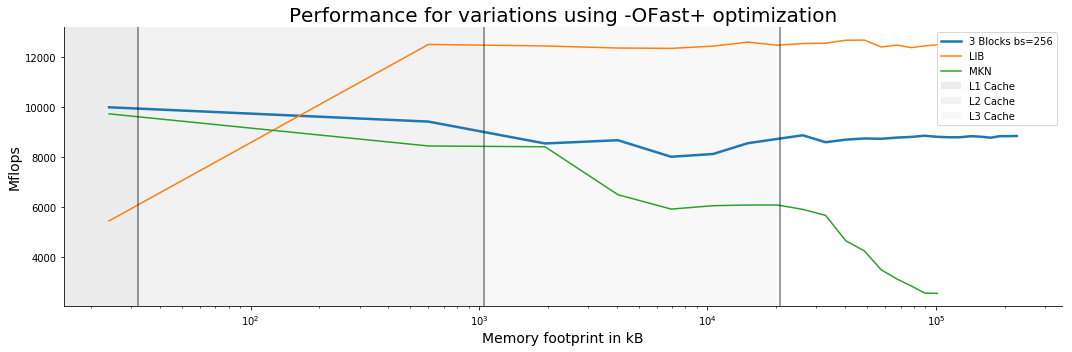

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
#ax.plot(list(best_2_blk[0]), list(best_2_blk[1]), label="2 Blocks, K,M bs=64", linewidth=1.5)
ax.plot(list(best_blk[0]), list(best_blk[1]), label="3 Blocks bs=256", linewidth=2.5)
ax.plot(list(lib[0]), list(lib[1]), label="LIB")
ax.plot(list(mkn[0]), list(mkn[1]), label="MKN")

plt.axvspan(0, 32, facecolor='0.5', alpha=0.15, label='L1 Cache')
plt.axvspan(32, 32+1024, facecolor='0.5', alpha=0.10, label='L2 Cache')
plt.axvspan(32+1024, 32+1024+19712, facecolor='0.5', alpha=0.05, label='L3 Cache')

plt.axvline(x=32, color='black', alpha=0.5)
plt.axvline(x=1024+32, color='black', alpha=0.5)
plt.axvline(x=1024+32+19712, color='black', alpha=0.5)

ax.set_title("Performance for variations using -OFast+ optimization", fontsize=20)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Memory footprint in kB", fontsize=14)
ax.set_ylabel("Mflops", fontsize=14)
ax.legend()
#ax.set_yscale('log')
ax.set_xscale('log')
fig.tight_layout()

plt.savefig("figs/performance_best_blocks.png", transparent=True)

plt.show()

# Cacheperformance optimized

In [14]:
data = pd.read_csv('res_optim.txt', sep=",")
data.columns= ["Name", "L1H", "L1M", "L2H", "L2M"]

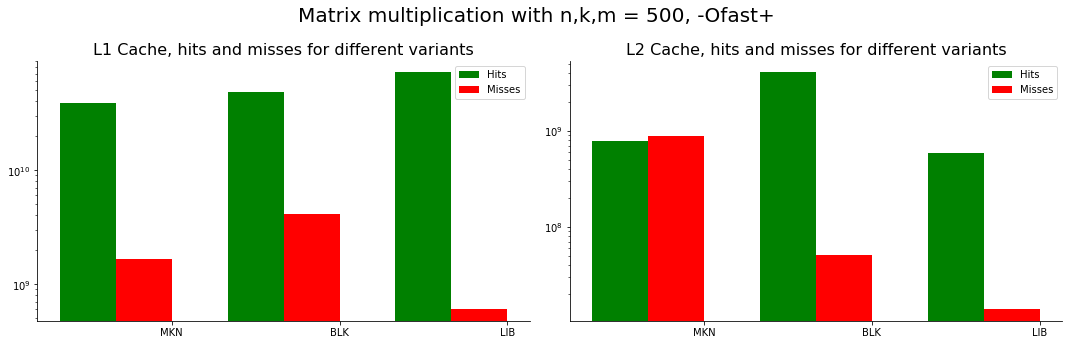

In [15]:
names = [i.upper() for i in list(data["Name"])]

N = len(names)
width = 1
ind = np.arange(N)

fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].bar(ind, list(data["L1H"]), width/3, label="Hits", color='g')
axs[0].bar(ind + width/3, list(data["L1M"]), width/3, label="Misses", color='r')
axs[0].set_title("L1 Cache, hits and misses for different variants", fontsize=16)
axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].set_xticks(ind + width/2)
axs[0].set_xticklabels(names)
axs[0].legend()
axs[0].set_yscale('log')

axs[1].bar(ind, list(data["L2H"]), width/3, label="Hits", color='g')
axs[1].bar(ind + width/3, list(data["L2M"]), width/3, label="Misses", color='r')
axs[1].set_title("L2 Cache, hits and misses for different variants", fontsize=16)
axs[1].spines["right"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].set_xticks(ind + width/2)
axs[1].set_xticklabels(names)
axs[1].legend()
axs[1].set_yscale('log')

fig.tight_layout()

st = fig.suptitle("Matrix multiplication with n,k,m = 500, -Ofast+", fontsize="20")

st.set_y(0.95)
fig.subplots_adjust(top=0.80)

plt.savefig("figs/profiling_of_optim.png", transparent=True)
plt.show()

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import mpl_toolkits.mplot3d as mp3d
import math

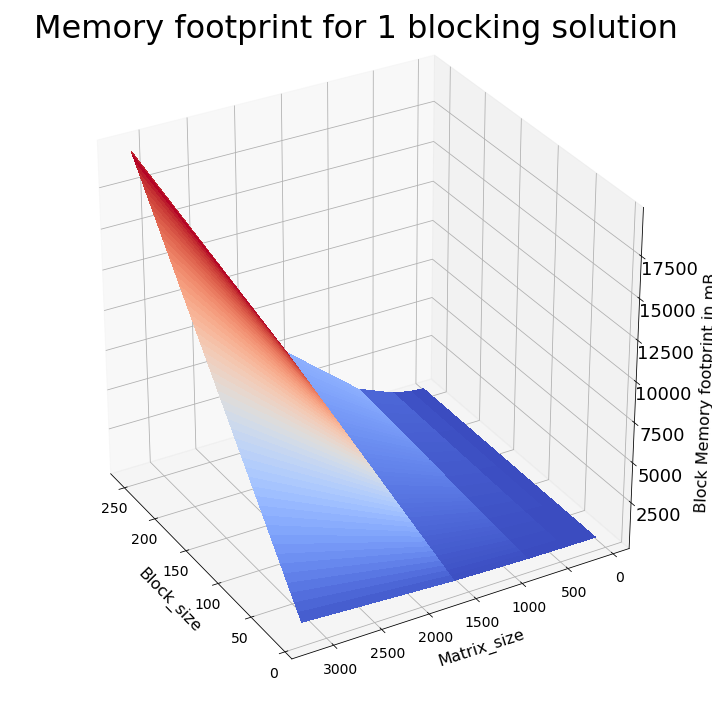

In [37]:
block_size = [i for i in range(8,256)]
matrix_size = [50*2**i for i in range(0,7)]

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

X = block_size# np.arange(-5, 5, 0.25)
Y = matrix_size#np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
#Z = X**3 / 1024 * 8  
Z = ((X) * Y) / 1024 / 1024 *8 *Y

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel("Block_size", fontsize=16, labelpad=10)
ax.set_ylabel("Matrix_size", fontsize=16, labelpad=10)
ax.set_zlabel("Block Memory footprint in mB", fontsize=16, labelpad=25)

st = fig.suptitle("Memory footprint for 1 blocking solution", fontsize="32")
st.set_y(0.975)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.zaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

    
ax.tick_params(axis='z', which='major', pad=10)

ax.view_init(30, 150)
fig.tight_layout()

plt.savefig("figs/memory_footprint_1_block.png", transparent=True)

plt.show()

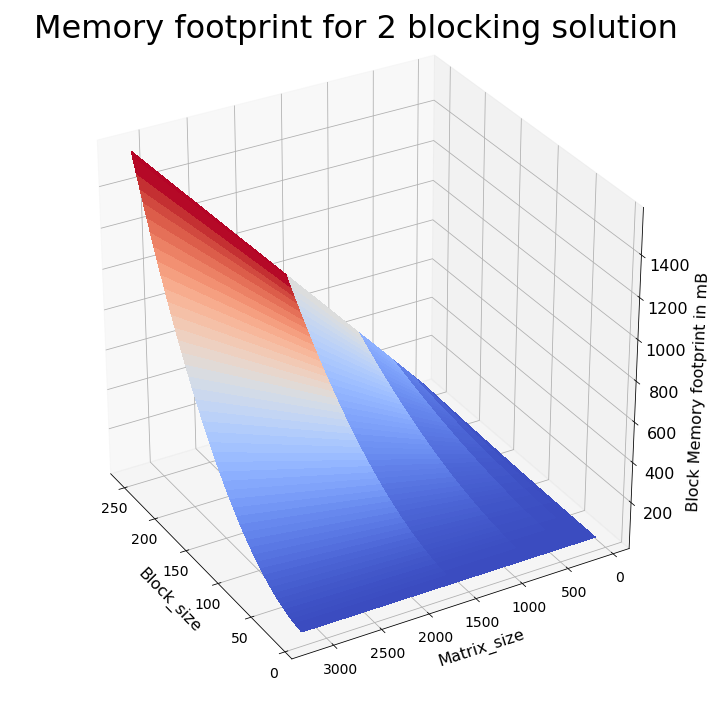

In [38]:
block_size = [i for i in range(8,256)]
matrix_size = [50*2**i for i in range(0,7)]

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

X = block_size# np.arange(-5, 5, 0.25)
Y = matrix_size#np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
#Z = X**3 / 1024 * 8  
Z = ((X**2) * Y) / 1024 / 1024 *8

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


# Add a color bar which maps values to colors.
ax.set_xlabel("Block_size", fontsize=16, labelpad=10)
ax.set_ylabel("Matrix_size", fontsize=16, labelpad=10)
ax.set_zlabel("Block Memory footprint in mB", fontsize=16, labelpad=20)
st = fig.suptitle("Memory footprint for 2 blocking solution", fontsize="32")
st.set_y(0.975)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.zaxis.get_major_ticks():
    tick.label.set_fontsize(16) 
    
ax.tick_params(axis='z', which='major', pad=10)

ax.view_init(30, 150)
fig.tight_layout()

plt.savefig("figs/memory_footprint_2_block.png", transparent=True)

plt.show()

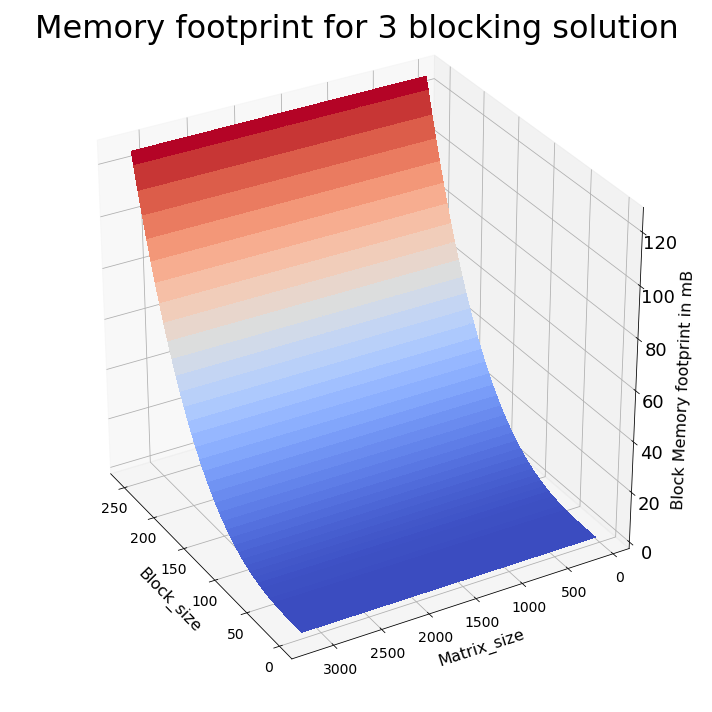

In [39]:
block_size = [i for i in range(0,256)]
matrix_size = [50*2**i for i in range(0,7)]

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

X = block_size# np.arange(-5, 5, 0.25)
Y = matrix_size#np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**3 / 1024 / 1024 * 8  

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel("Block_size", fontsize=16, labelpad=10)
ax.set_ylabel("Matrix_size", fontsize=16, labelpad=10)
ax.set_zlabel("Block Memory footprint in mB", fontsize=16, labelpad=10)

st = fig.suptitle("Memory footprint for 3 blocking solution", fontsize="32")
st.set_y(0.975)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.zaxis.get_major_ticks():
    tick.label.set_fontsize(18) 


ax.view_init(30, 150)
fig.tight_layout()

plt.savefig("figs/memory_footprint_3_block.png", transparent=True)

plt.show()

In [34]:
((32+1024+19712)*1024/8)**(1/3)

138.52714434495732

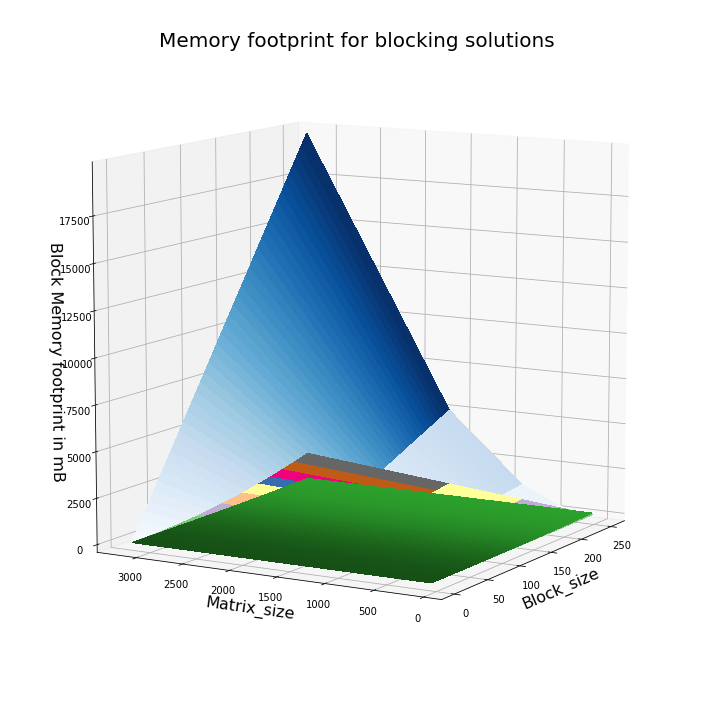

In [35]:
block_size = [i for i in range(0,256)]
matrix_size = [50*2**i for i in range(0,7)]

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

X = block_size# np.arange(-5, 5, 0.25)
Y = matrix_size#np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

Z = ((X) * Y) / 1024 / 1024 *8 *Y
surf = ax.plot_surface(X, Y, Z, cmap=cm.Blues, linewidth=0, antialiased=False, label="1")

Z = ((X**2) * Y) / 1024 / 1024 *8
surf = ax.plot_surface(X, Y, Z, cmap=cm.Accent, linewidth=0, antialiased=False, label="2")

Z = X**3 / 1024 / 1024 * 8  
surf = ax.plot_surface(X, Y, Z, cmap=None, linewidth=0, antialiased=False, label="3")


ax.set_xlabel("Block_size", fontsize=16)
ax.set_ylabel("Matrix_size", fontsize=16)
ax.set_zlabel("Block Memory footprint in mB", fontsize=16)

st = fig.suptitle("Memory footprint for blocking solutions", fontsize="20")
st.set_y(0.95)

ax.view_init(10, 210)
fig.tight_layout()


plt.savefig("figs/memory_footprint_4_block.png", transparent=True)

plt.show()